# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [340]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
PUIdata = os.getenv('PUIDATA')

In [48]:
# Load dataset
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9', 
                       usecols=['Borough', 'Community Board', 'Complaint Type', 'Resolution Description', 'Created Date'])

In [49]:
data.head()

Created Date                 Complaint Type  \
0  11/05/2015 02:59:15 AM               Street Condition   
1  11/05/2015 02:09:49 AM          Opinion for the Mayor   
2  11/05/2015 02:06:51 AM  Root/Sewer/Sidewalk Condition   
3  11/05/2015 02:02:20 AM                Illegal Parking   
4  11/05/2015 01:57:20 AM       Benefit Card Replacement   

                              Resolution Description Community Board  \
0                                                NaN     13 BROOKLYN   
1  Your comments have been submitted to the Mayor...   0 Unspecified   
2  The Department of Parks and Recreation usually...     18 BROOKLYN   
3  Your complaint has been received by the Police...     12 BROOKLYN   
4  The Human Resources Administration received yo...   0 Unspecified   

       Borough  
0     BROOKLYN  
1  Unspecified  
2     BROOKLYN  
3     BROOKLYN  
4  Unspecified

# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [12]:
# Check if all Boroughs and Community Districts are represented in the Data
print('Boroughs presented in Data: {}'.format(data.Borough.unique()))
print('Community Districts presented in Data: {}'.format(data['Community Board'].unique()))

Boroughs presented in Data: ['BROOKLYN' 'Unspecified' 'STATEN ISLAND' 'MANHATTAN' 'BRONX' 'QUEENS']
Community Districts presented in Data: ['13 BROOKLYN' '0 Unspecified' '18 BROOKLYN' '12 BROOKLYN'
 '02 STATEN ISLAND' '08 MANHATTAN' '06 BROOKLYN' '10 BRONX' '06 MANHATTAN'
 '04 BROOKLYN' '04 QUEENS' '09 MANHATTAN' '14 BROOKLYN' '05 MANHATTAN'
 '02 MANHATTAN' '10 QUEENS' '07 QUEENS' '02 QUEENS' '11 BROOKLYN'
 '05 QUEENS' '05 BROOKLYN' '09 QUEENS' '12 MANHATTAN' '01 BROOKLYN'
 '11 MANHATTAN' '03 BRONX' '03 STATEN ISLAND' '08 BROOKLYN' '03 BROOKLYN'
 '07 MANHATTAN' '10 MANHATTAN' '04 BRONX' '01 MANHATTAN' '07 BRONX'
 '09 BRONX' '03 MANHATTAN' '13 QUEENS' '02 BRONX' '12 QUEENS' '16 BROOKLYN'
 '08 QUEENS' '04 MANHATTAN' '14 QUEENS' '10 BROOKLYN' '11 QUEENS'
 '06 BRONX' '08 BRONX' '05 BRONX' '15 BROOKLYN' '02 BROOKLYN' '12 BRONX'
 '03 QUEENS' '06 QUEENS' '01 STATEN ISLAND' '01 BRONX' '01 QUEENS'
 '17 BROOKLYN' '11 BRONX' 'Unspecified QUEENS' '09 BROOKLYN'
 'Unspecified MANHATTAN' 'Unspecified

In [13]:
# How many unique values do we have? 
print('Number of boroughs presented in Data: {}'.format(len(data.Borough.unique())))
print('Number of community districts presented in Data: {}'.format(len(data['Community Board'].unique())))

Number of boroughs presented in Data: 6
Number of community districts presented in Data: 77


In [ ]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

In [ ]:
# Check for duplicates? Are these plausible?

In [52]:
print('Fraction of duplicates in data: {}'.format(float(np.sum(data.duplicated()))/len(data)))

Fraction of duplicates in data: 0.253111329805


In [55]:
data_duplicate = data[data.duplicated()]

In [60]:
data_duplicate_complaint = data_duplicate.groupby(['Complaint Type'])
data_duplicate_description = data_duplicate.groupby(['Resolution Description'])
data_duplicate_community = data_duplicate.groupby(['Community Board'])
data_duplicate_borough = data_duplicate.groupby(['Borough'])

In [107]:
data_duplicate_complaint.count().iloc[:,0].sort_values(ascending=False).head(10)

Complaint Type
HEATING                   577374
GENERAL CONSTRUCTION      392765
PLUMBING                  350832
PAINT - PLASTER           272774
HEAT/HOT WATER            196346
NONCONST                  181274
Street Light Condition    129427
ELECTRIC                  112079
PAINT/PLASTER              63267
UNSANITARY CONDITION       59357
Name: Created Date, dtype: int64

In [91]:
data_duplicate_description.count().iloc[:,0].sort_values(ascending=False).head(10)

Resolution Description
The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.                                                                                                                                                                                               675650
The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.                                                                                                                                                          410808
The Department of Housing Preservation and Development was not able to gain access to inspect the following conditions. The complaint has been closed. If the condition still exists, please file a new complaint.                                                                           

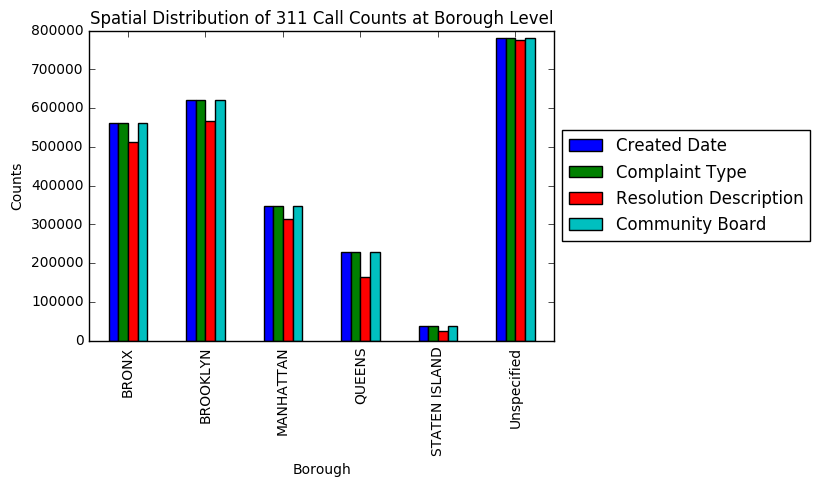

In [106]:
data_duplicate_borough.count().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Counts')
plt.title('Spatial Distribution of 311 Call Counts at Borough Level')
plt.show()

# Bar plot of number of 311 calls at borough level. 

In [100]:
data_duplicate_community.count().iloc[:,0].sort_values(ascending=False).head(10)

Community Board
0 Unspecified           781309
12 MANHATTAN            106733
07 BRONX                 82279
04 BRONX                 81490
Unspecified BROOKLYN     79344
Unspecified BRONX        76154
05 BRONX                 73317
17 BROOKLYN              69816
14 BROOKLYN              62273
03 BROOKLYN              56055
Name: Created Date, dtype: int64

Most of the duplicates have unspecified community districts.

In [56]:
data2 = data.drop_duplicates()

In [120]:
# What about missing values? Can you detect any patterns? 
data2_nan = data2.isnull()

In [138]:
for column in data2_nan:
    print('Number of missing values in column {}: {}'.format(column, data2_nan[column].sum()))

Number of missing values in column Created Date: 0
Number of missing values in column Complaint Type: 0
Number of missing values in column Resolution Description: 3566717
Number of missing values in column Community Board: 0
Number of missing values in column Borough: 0


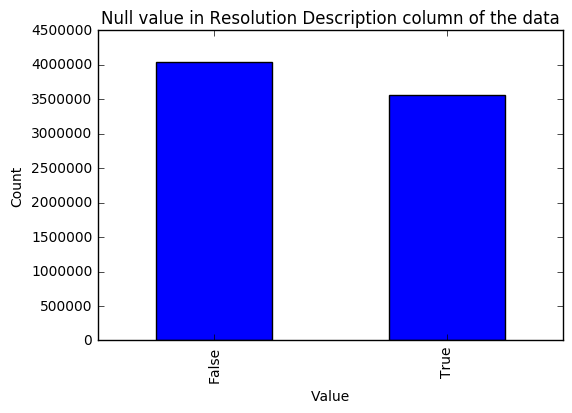

In [365]:
data2_nan['Resolution Description'].value_counts().plot(kind='bar')
plt.title('Null value in Resolution Description column of the data')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

# Comparison of null value in Resolution Description column of the data. 'True' represents missing value in the data.

In [ ]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

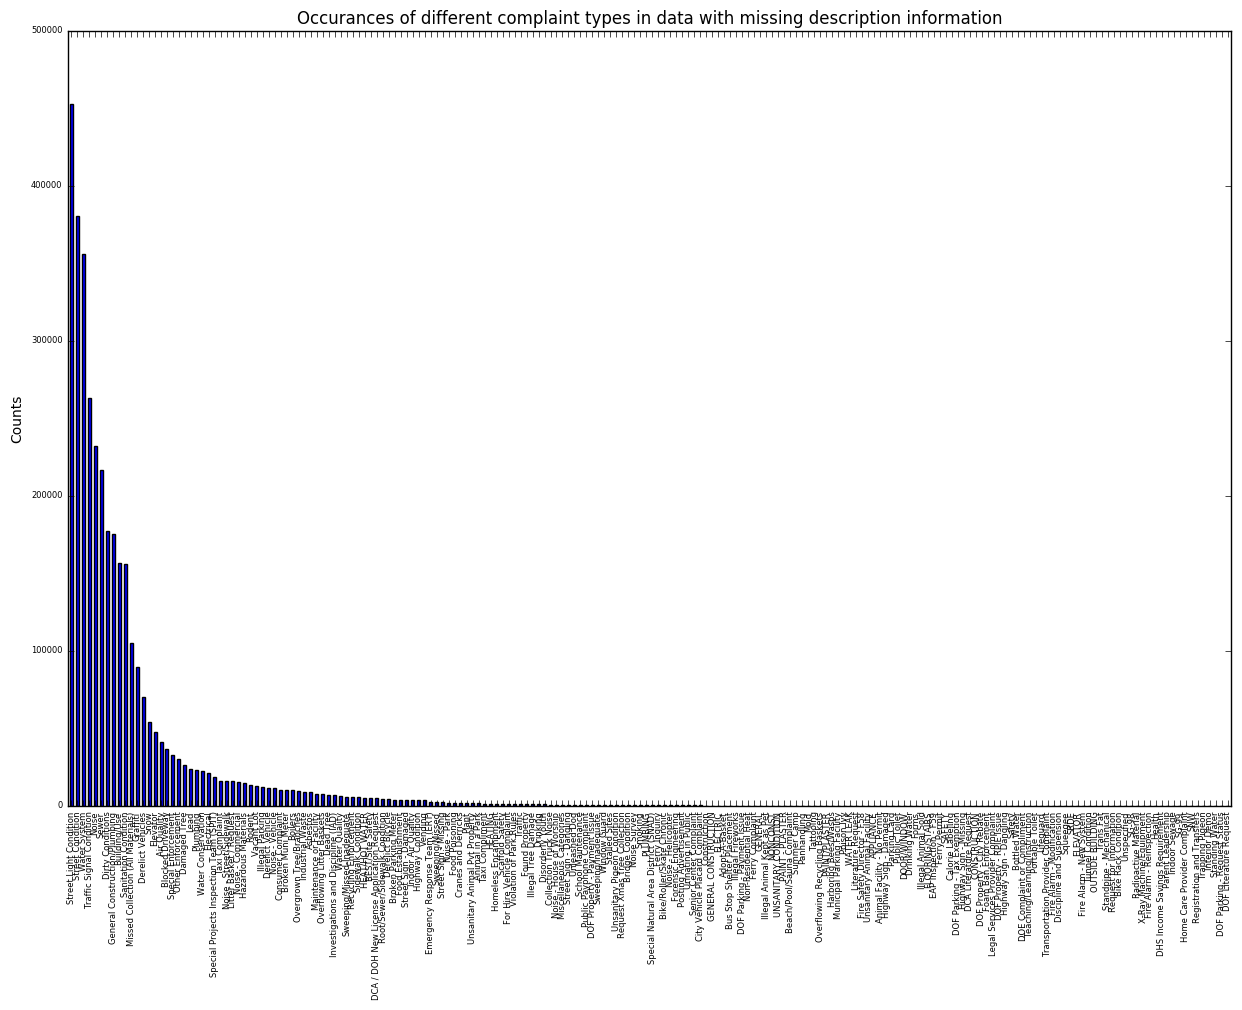

In [151]:
data2['Complaint Type'][data2_nan.iloc[:,2]].value_counts().plot(kind='bar', figsize=(15, 10), fontsize=6)
plt.ylabel('Counts')
plt.title('Occurances of different complaint types in data with missing description information')
plt.show()

# Category of missing values in the Resolution Description column of the data

In [163]:
# Generate marker for unplausible Community Districts
# How do these districts look like?
ls = []
borough = {'BROOKLYN': 18, 'STATEN ISLAND': 3, 'MANHATTAN': 12, 'BRONX': 12, 'QUEENS': 14}
for boro, num in borough.iteritems():
    for i in range(1, num+1):
        if i < 10:
            community = str(0) + str(i) + ' ' + boro
        else:
            community = str(i) + ' ' + boro
        ls.append(community)

In [166]:
community_marker = data2['Community Board'].isin(ls)

In [168]:
# Drop the marked districts
data3 = data2[community_marker]

In [177]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
data3.drop(['Borough', 'Complaint Type', 'Resolution Description', 'Created Date'], inplace=True, axis=1)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [180]:
data3['Community Board'].value_counts()

12 QUEENS           196280
07 QUEENS           182143
01 BROOKLYN         164113
01 STATEN ISLAND    161676
12 MANHATTAN        161320
01 QUEENS           154919
05 QUEENS           154354
13 QUEENS           152222
18 BROOKLYN         141270
03 BROOKLYN         141251
05 BROOKLYN         140715
05 MANHATTAN        139184
09 QUEENS           138211
03 MANHATTAN        133308
08 MANHATTAN        132264
12 BROOKLYN         131975
03 STATEN ISLAND    131444
07 MANHATTAN        130765
15 BROOKLYN         130302
02 MANHATTAN        125546
14 BROOKLYN         125521
12 BRONX            122621
17 BROOKLYN         121904
04 MANHATTAN        120640
11 BROOKLYN         120628
10 QUEENS           119980
02 STATEN ISLAND    116288
08 QUEENS           112844
02 BROOKLYN         110131
03 QUEENS           107122
06 BROOKLYN         105309
09 BRONX            103955
07 BRONX            103450
02 QUEENS           103208
04 BROOKLYN         101321
04 BRONX            100463
10 BROOKLYN          99385
1

In [245]:
# Safe reduced data frame (Community District level)
df_complaints = pd.DataFrame(data3['Community Board'].value_counts())

In [249]:
df_complaints.reset_index(inplace=True)

In [254]:
df_complaints

index  Community Board
0          12 QUEENS           196280
1          07 QUEENS           182143
2        01 BROOKLYN           164113
3   01 STATEN ISLAND           161676
4       12 MANHATTAN           161320
5          01 QUEENS           154919
6          05 QUEENS           154354
7          13 QUEENS           152222
8        18 BROOKLYN           141270
9        03 BROOKLYN           141251
10       05 BROOKLYN           140715
11      05 MANHATTAN           139184
12         09 QUEENS           138211
13      03 MANHATTAN           133308
14      08 MANHATTAN           132264
15       12 BROOKLYN           131975
16  03 STATEN ISLAND           131444
17      07 MANHATTAN           130765
18       15 BROOKLYN           130302
19      02 MANHATTAN           125546
20       14 BROOKLYN           125521
21          12 BRONX           122621
22       17 BROOKLYN           121904
23      04 MANHATTAN           120640
24       11 BROOKLYN           120628
25         10 QUEENS           119980
26  02 STATEN ISLAND           116288
27         08 QUEENS           112844
28       02 BROOKLYN           110131
29         03 QUEENS           107122
30       06 BROOKLYN           105309
31          09 BRONX           103955
32          07 BRONX           103450
33         02 QUEENS           103208
34       04 BROOKLYN           101321
35          04 BRONX           100463
36       10 BROOKLYN            99385
37         11 QUEENS            97354
38      10 MANHATTAN            96892
39      06 MANHATTAN            96368
40       08 BROOKLYN            94608
41       07 BROOKLYN            93446
42          11 BRONX            92487
43          05 BRONX            87761
44      09 MANHATTAN            87502
45         04 QUEENS            85960
46         14 QUEENS            85032
47       09 BROOKLYN            84008
48          10 BRONX            83902
49         06 QUEENS            81950
50      01 MANHATTAN            76177
51      11 MANHATTAN            75076
52          08 BRONX            66958
53          06 BRONX            63329
54       16 BROOKLYN            62939
55       13 BROOKLYN            61885
56          01 BRONX            55493
57          03 BRONX            53617
58          02 BRONX            43933

In [256]:
df_complaints.rename(columns={'index': 'Community District', 'Community Board': 'Number of Complaints'}, inplace=True)

In [258]:
df_complaints.head()

Community District  Number of Complaints
0          12 QUEENS                196280
1          07 QUEENS                182143
2        01 BROOKLYN                164113
3   01 STATEN ISLAND                161676
4       12 MANHATTAN                161320

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [181]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [182]:
# Check variables in file
df_pop.head()

FIPS cd_id  Total Population  Population Density (per sq. mile)  \
0  3603701  BX08            106737                        31229.95006   
1  3603702  BX12            134644                        19966.67839   
2  3603703  BX10            121209                        12913.81703   
3  3603704  BX11            135839                        35677.95453   
4  3603705  BX03            172247                        39405.79222   

   % Total Population: Male  % Total Population: 18 to 24 Years  \
0                     46.65                               10.73   
1                     46.35                               11.35   
2                     45.20                                8.62   
3                     50.09                                8.10   
4                     44.72                               14.24   

   % Total Population: 25 to 34 Years  % Total Population: 35 to 44 Years  \
0                               15.04                               11.32   
1                               14.29                               12.57   
2                               13.74                               12.78   
3                               17.43                               14.09   
4                               14.89                               12.38   

   % Population 5 Years And Over: Speak Only English  \
0                                              46.80   
1                                              73.09   
2                                              61.79   
3                                              43.22   
4                                              36.82   

   % Population 5 Years And Over: Spanish or Spanish Creole  \
0                                              39.24          
1                                              18.19          
2                                              26.43          
3                                              36.45          
4                                              54.24          

                                                                                ...                                                                                \
0                                                                               ...                                                                                 
1                                                                               ...                                                                                 
2                                                                               ...                                                                                 
3                                                                               ...                                                                                 
4                                                                               ...                                                                                 

   Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations  \
0                                                665                                                                                      
1                                               1156                                                                                      
2                                                941                                                                                      
3                                               2189                                                                                      
4                                               1437                                                                                      

   Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations

In [185]:
for i in df_pop.columns:
    print i

FIPS
cd_id
Total Population
Population Density (per sq. mile)
% Total Population: Male
% Total Population: 18 to 24 Years
% Total Population: 25 to 34 Years
% Total Population: 35 to 44 Years
% Population 5 Years And Over: Speak Only English
% Population 5 Years And Over: Spanish or Spanish Creole
% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"
% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"
Population 25 Years and over:
Population 25 Years and over: Less Than High School
Population 25 Years and over: High School Graduate (includes equivalency)
Population 25 Years and over: Some college
Population 25 Years and over: Bachelor's degree
Population 25 Years and over: Master's degree
Population 25 Years and over: Professional school degree
Population 25 Years and over: Doctorate degree
% Population 25 Years and over: Less Than High School
% Population 25 Years and over: High School Graduate (includes equivalen

In [188]:
# How many community districts are in file? 
print df_pop.cd_id.unique()
print('Number of community districts: {}'.format(len(df_pop.cd_id.unique())))

['BX08' 'BX12' 'BX10' 'BX11' 'BX03' 'BX06' 'BX07' 'BX05' 'BX04' 'BX09'
 'BX01' 'BX02' 'MN12' 'MN09' 'MN10' 'MN11111' 'MN08' 'MN07' 'MN05' 'MN04'
 'MN06' 'MN03' 'MN01' 'MN02' 'SI03' 'SI02' 'SI01' 'BK01' 'BK04' 'BK03'
 'BK02' 'BK06' 'BK08' 'BK16' 'BK05' 'BK18' 'BK17' 'BK09' 'BK07' 'BK10'
 'BK12' 'BK14' 'BK15' 'BK11' 'BK13' 'QN01' 'QN03' 'QN07' 'QN11' 'QN13'
 'QN08' 'QN04' 'QN06' 'QN02' 'QN05' 'QN09' 'QN12' 'QN10' 'QN14']
Number of community districts: 59


In [193]:
# Correct the typo of 'MN11111' to 'MN11' above
df_pop.cd_id[15] = 'MN11'

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [195]:
# Check the corrected column of cd_id
df_pop.cd_id

0     BX08
1     BX12
2     BX10
3     BX11
4     BX03
5     BX06
6     BX07
7     BX05
8     BX04
9     BX09
10    BX01
11    BX02
12    MN12
13    MN09
14    MN10
15    MN11
16    MN08
17    MN07
18    MN05
19    MN04
20    MN06
21    MN03
22    MN01
23    MN02
24    SI03
25    SI02
26    SI01
27    BK01
28    BK04
29    BK03
30    BK02
31    BK06
32    BK08
33    BK16
34    BK05
35    BK18
36    BK17
37    BK09
38    BK07
39    BK10
40    BK12
41    BK14
42    BK15
43    BK11
44    BK13
45    QN01
46    QN03
47    QN07
48    QN11
49    QN13
50    QN08
51    QN04
52    QN06
53    QN02
54    QN05
55    QN09
56    QN12
57    QN10
58    QN14
Name: cd_id, dtype: object

In [199]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
df_pop[['cd_id','Population 25 Years and over:.1']].sort('Population 25 Years and over:.1', ascending=False)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


cd_id  Population 25 Years and over:.1
47  QN07                           191003
16  MN08                           176877
56  QN12                           164402
12  MN12                           156990
17  MN07                           152890
35  BK18                           142018
45  QN01                           140503
49  QN13                           137646
43  BK11                           134004
23  MN02                           127347
22  MN01                           127347
46  QN03                           126775
9   BX09                           124858
19  MN04                           123610
18  MN05                           123610
21  MN03                           119679
54  QN05                           118316
41  BK14                           117350
24  SI03                           117237
20  MN06                           117040
26  SI01                           115112
50  QN08                           111850
53  QN02                           110758
27  BK01                           109377
51  QN04                           103075
38  BK07                           102210
42  BK15                           101348
30  BK02                            99602
55  QN09                            99485
34  BK05                            99130
5   BX06                            98478
4   BX03                            98478
10  BX01                            96953
11  BX02                            96953
36  BK17                            95700
14  MN10                            93661
3   BX11                            93326
31  BK06                            92542
25  SI02                            92007
40  BK12                            91710
39  BK10                            91642
57  QN10                            89755
48  QN11                            89069
28  BK04                            88277
1   BX12                            88219
15  MN11                            87020
2   BX10                            85902
32  BK08                            85785
29  BK03                            85707
52  QN06                            85476
6   BX07                            85390
13  MN09                            83561
8   BX04                            83401
44  BK13                            78970
7   BX05                            78582
33  BK16                            75261
37  BK09                            73025
58  QN14                            72477
0   BX08                            71928

In [200]:
# Save data frame
df_pop.head()

FIPS cd_id  Total Population  Population Density (per sq. mile)  \
0  3603701  BX08            106737                        31229.95006   
1  3603702  BX12            134644                        19966.67839   
2  3603703  BX10            121209                        12913.81703   
3  3603704  BX11            135839                        35677.95453   
4  3603705  BX03            172247                        39405.79222   

   % Total Population: Male  % Total Population: 18 to 24 Years  \
0                     46.65                               10.73   
1                     46.35                               11.35   
2                     45.20                                8.62   
3                     50.09                                8.10   
4                     44.72                               14.24   

   % Total Population: 25 to 34 Years  % Total Population: 35 to 44 Years  \
0                               15.04                               11.32   
1                               14.29                               12.57   
2                               13.74                               12.78   
3                               17.43                               14.09   
4                               14.89                               12.38   

   % Population 5 Years And Over: Speak Only English  \
0                                              46.80   
1                                              73.09   
2                                              61.79   
3                                              43.22   
4                                              36.82   

   % Population 5 Years And Over: Spanish or Spanish Creole  \
0                                              39.24          
1                                              18.19          
2                                              26.43          
3                                              36.45          
4                                              54.24          

                                                                                ...                                                                                \
0                                                                               ...                                                                                 
1                                                                               ...                                                                                 
2                                                                               ...                                                                                 
3                                                                               ...                                                                                 
4                                                                               ...                                                                                 

   Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations  \
0                                                665                                                                                      
1                                               1156                                                                                      
2                                                941                                                                                      
3                                               2189                                                                                      
4                                               1437                                                                                      

   Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations

In [201]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [202]:
# Check variables in file
df_infr.head()

FIPS Geographic Identifier  \
0  3603701        79500US3603701   
1  3603702        79500US3603702   
2  3603703        79500US3603703   
3  3603704        79500US3603704   
4  3603705        79500US3603705   

                                     Qualifying Name  Households  \
0  NYC-Bronx Community District 8--Riverdale, New...       42035   
1  NYC-Bronx Community District 12--Wakefield, Ne...       44830   
2  NYC-Bronx Community District 10--Co-op City, N...       47050   
3  NYC-Bronx Community District 11--Pelham Parkwa...       44922   
4  NYC-Bronx Community District 3 & 6--Belmont, N...       57556   

   Households: With An Internet Subscription  Households: Dial-Up Alone  \
0                                      31795                        444   
1                                      32243                        178   
2                                      32729                        158   
3                                      32003                        141   
4                                      35503                         88   

   Households: Dsl  Households: With Mobile Broadband  \
0             2813                                946   
1              849                                405   
2             1863                                398   
3             1478                                474   
4             1297                                651   

   Households: Without Mobile Broadband  Households: Cable Modem  \
0                                  1867                    19178   
1                                   444                    18653   
2                                  1465                    20044   
3                                  1004                    17917   
4                                   646                    15847   

            ...             Households: Mobile Broadband Alone or With Dialup  \
0           ...                                                          2168   
1           ...                                                           928   
2           ...                                                           639   
3           ...                                                          1001   
4           ...                                                          1385   

   Households: Internet Access Without A Subscription  \
0                                               2119    
1                                               1891    
2                                               2882    
3                                               2722    
4                                               3312    

   Households: No Internet Access  \
0                            8121   
1                           10696   
2                           11439   
3                           10197   
4                           18741   

   % Households: With An Internet Subscription  Households.1  \
0                                        75.64         42035   
1                                        71.92         44830   
2                                        69.56         47050   
3                                        71.24         44922   
4                                        61.68         57556   

   Households: Has A Computer  \
0                       35048   
1                       36700   
2                       38700   
3                       37237   
4                       42576   

   Households: With Dial-Up Internet Subscription Alone  \
0                                                404      
1                                                178      
2                                                158      
3                                                122      
4                                                 88      

   Households: With A Broadband Internet Subscription  \
0                                              30943    
1                                              31435    
2             

In [203]:
len(df_infr)

59

In [204]:
for i in df_infr.columns:
    print i

FIPS
Geographic Identifier
Qualifying Name
Households
Households: With An Internet Subscription
Households: Dial-Up Alone
Households: Dsl
Households: With Mobile Broadband
Households: Without Mobile Broadband
Households: Cable Modem
Households: With Mobile Broadband.1
Households: Without Mobile Broadband.1
Households: Fiber-Optic
Households: With Mobile Broadband.2
Households: Without Mobile Broadband.2
Households: Satellite Internet Service
Households: With Mobile Broadband.3
Households: Without Mobile Broadband.3
Households: Two or More Fixed Broadband Types, or Other
Households: With Mobile Broadband.4
Households: Without Mobile Broadband.4
Households: Mobile Broadband Alone or With Dialup
Households: Internet Access Without A Subscription
Households: No Internet Access
% Households: With An Internet Subscription
Households.1
Households: Has A Computer
Households: With Dial-Up Internet Subscription Alone
Households: With A Broadband Internet Subscription
Households: Without An Inter

In [208]:
# How many community districts are in file? 
print(df_infr['Qualifying Name'].unique())
print('Number of Community Districts: {}'.format(len(df_infr['Qualifying Name'].unique())))

['NYC-Bronx Community District 8--Riverdale, New York'
 'NYC-Bronx Community District 12--Wakefield, New York'
 'NYC-Bronx Community District 10--Co-op City, New York'
 'NYC-Bronx Community District 11--Pelham Parkway, New York'
 'NYC-Bronx Community District 3 & 6--Belmont, New York'
 'NYC-Bronx Community District 7--Bedford Park, New York'
 'NYC-Bronx Community District 5--Morris Heights, New York'
 'NYC-Bronx Community District 4--Concourse, New York'
 'NYC-Bronx Community District 9--Castle Hill, New York'
 'NYC-Bronx Community District 1 & 2--Hunts Point, New York'
 'NYC-Manhattan Community District 12--Washington Heights, New York'
 'NYC-Manhattan Community District 9--Hamilton Heights, New York'
 'NYC-Manhattan Community District 10--Central Harlem PUMA, New York'
 'NYC-Manhattan Community District 11--East Harlem PUMA, New York'
 'NYC-Manhattan Community District 8--Upper East Side PUMA, New York'
 'NYC-Manhattan Community District 7--Upper West Side & West Side PUMA, New York'

In [231]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
df_infr['Mobile Subscription'] = df_infr['Households: With Mobile Broadband'] + df_infr['Households: With Mobile Broadband.1']
df_infr['Mobile Subscription'] = df_infr['Mobile Subscription'] + df_infr['Households: With Mobile Broadband.2']
df_infr['Mobile Subscription'] = df_infr['Mobile Subscription'] + df_infr['Households: With Mobile Broadband.3']
df_infr['Mobile Subscription'] = df_infr['Mobile Subscription'] + df_infr['Households: With Mobile Broadband.4']
df_infr['Mobile Subscription'] = df_infr['Mobile Subscription'] + df_infr['Households: Mobile Broadband Alone or With Dialup']

In [236]:
# Aggregate internet type by high and low connections
df_infr['Low Internet Connection'] = df_infr['Households: Dial-Up Alone'] + df_infr['Households: Dsl']
df_infr['High Internet Connection'] = df_infr['Households: Cable Modem'] + df_infr['Households: Fiber-Optic']
df_infr['High Internet Connection'] = df_infr['High Internet Connection'] + df_infr['Households: Satellite Internet Service']

In [238]:
# Save data frame

# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [273]:
borough_abb = {'QUEENS': 'QN', 'BROOKLYN': 'BK', 'STATEN ISLAND': 'SI', 'MANHATTAN': 'MN', 'BRONX': 'BX'}
for i in range(len(df_complaints)):
    for boro, abb in borough_abb.iteritems():
        if df_complaints['Community District'][i][3:] == boro:
            df_complaints['Community District'][i] = abb + df_complaints['Community District'][i][:2]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [276]:
print df_complaints.head()

  Community District  Number of Complaints
0               QN12                196280
1               QN07                182143
2               BK01                164113
3               SI01                161676
4               MN12                161320


In [289]:
# Link df_infr and df_pop with FIPS column
df_pop_infr= pd.merge(df_pop, df_infr, on='FIPS', suffixes=('_pop', '_infr'))

In [310]:
df_pop_infr.drop_duplicates(subset='cd_id', inplace=True)

In [280]:
# rename column Community District to cd_id
df_complaints.rename(columns={'Community District': 'cd_id'}, inplace=True)

In [313]:
# Link df_complaint and df_pop_infr with cd_id column
df_combined = pd.merge(df_complaints, df_pop_infr, on='cd_id')

In [335]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?
df_reduced = df_combined[['cd_id', 'Number of Complaints', 'Total Population', 
                          'Population Density (per sq. mile)', 'Population 25 Years and over:', 
                          'Median household income (In 2014 Inflation Adjusted Dollars)', 
                          'Per capita income (In 2014 Inflation Adjusted Dollars)', 'Low Internet Connection', 
                          'High Internet Connection', 'Mobile Subscription', 'Households: With An Internet Subscription', 
                          'Households:']]

In [350]:
complaint_corr = df_combined.corr().iloc[0,:]

In [355]:
complaint_corr.sort_values(inplace=True)

In [363]:
print complaint_corr.tail(10)

Population 25 Years and over:.1                                                                  0.656897
Population 25 Years and over:                                                                    0.656897
Employed Civilian Population 16 Years And Over:                                                  0.663651
Employed civilian Population 16 Years and over:                                                  0.663651
Employed Civilian Population 16 Years And Over:.1                                                0.663651
Employed civilian Population 16 Years and over: Office and administrative support occupations    0.665934
Households: $75,000 to $99,999                                                                   0.677453
Households: $60,000 to $74,999                                                                   0.693903
Employed Civilian Population 16 Years And Over: Sales and office occupations                     0.736396
Number of Complaints                          

In [364]:
print complaint_corr.head(10)

% Households: Less than $10,000                                                                                -0.523752
% Households: $10,000 to $14,999                                                                               -0.462610
% Households: $15,000 to $19,999                                                                               -0.404317
% Population 3 Years and over Enrolled In School: Public School: K-8                                           -0.358927
% Population 25 Years and over: Less Than High School.1                                                        -0.347107
% Population 25 Years and over: Less Than High School                                                          -0.347107
Households: Less than $10,000                                                                                  -0.314842
% Employed civilian Population 16 Years and over: Building and grounds cleaning and maintenance  occupations   -0.290876
% Employed civilian Population 1

# According to the correlation results above, the demographics of a community district pose larger influence on the number of complaints. Some demographic indicators, such as Employed Civilian Population 16 Years And Over: Sales and office occupations and % Households: Less than \$10,000, show a stronger correlation effect on the number of complaints in community districts (Though they have oppsite correlation impacts). On the other hand, the Infrastructure-related indicators do not show a strong correlation with the number of complaints, neither positive nor negative.